In [1]:
%matplotlib notebook
%matplotlib notebook
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np



set datapath to MIROVA dataset

In [2]:
path_MIROVA = 'path to MIROVA dataset'

set time-periods of volcanic active periods (2018 and 2021) and time-period assumed to be activity-free

In [3]:
## event start and end dates
event_2021_start = datetime(2021,2,28)
event_2021_end = datetime(2021,4,3)

event_2018_start = datetime(2018,9,4)
event_2018_end = datetime(2019,1,10)

# years with no activity
no_activity_start = datetime(2019, 4, 15)
no_activity_end = datetime(2020, 12, 15)

read in MIROVA data and extract volcanic radiative power (VRP)

In [4]:
# read in MIROVA MODIS data
file = 'MIROVA_Veniaminof.csv'
path_MIROVA_join=os.path.join(path_MIROVA,file)
data_MIROVA = pd.read_csv(path_MIROVA_join).drop(['sat zen','sat azi','UTM_X','UTM_Y','Summit Dist (m)'],axis=1)
time_data=pd.to_datetime(data_MIROVA['Date'])
data_MIROVA=pd.concat([time_data,data_MIROVA['VRP (Watt)']],axis=1)
data_MIROVA=data_MIROVA.sort_values(by='Date')

print(data_MIROVA)

          Date    VRP (Watt)
0   2018-09-09  1.323770e+08
1   2018-09-09  1.544164e+08
2   2018-09-09  1.777839e+08
3   2018-09-09  1.132704e+08
4   2018-09-09  9.274083e+07
5   2018-09-09  1.399451e+08
10  2018-09-10  2.212203e+08
8   2018-09-10  2.188056e+07
9   2018-09-10  2.656835e+08
6   2018-09-10  8.806721e+06
7   2018-09-10  5.720863e+07
11  2018-09-11  1.211490e+08
12  2018-09-11  2.163480e+08
13  2018-09-11  2.067433e+08
14  2018-09-11  1.275483e+07
15  2018-09-11  1.819782e+08
16  2018-09-11  6.703930e+07
22  2018-09-12  3.193017e+08
20  2018-09-12  3.011346e+08
21  2018-09-12  4.253351e+06
18  2018-09-12  2.479901e+08
17  2018-09-12  1.547154e+08
19  2018-09-12  1.527346e+08
23  2018-09-13  3.245197e+08
24  2018-09-13  2.134440e+08
25  2018-09-14  4.299963e+07
26  2018-09-14  1.869857e+08
27  2018-09-14  1.729042e+08
28  2018-09-14  3.127690e+07
29  2018-09-15  3.825706e+08
..         ...           ...
340 2021-03-12  1.952119e+07
341 2021-03-13  2.804139e+06
342 2021-03-13

convert VRP (Watt) to VRP (MW)

In [5]:
def get_megawatt(x):
    div = 1e06
    megawatt = x/div
    return megawatt

data_MIROVA['VRP (MW)'] = data_MIROVA['VRP (Watt)'].map(get_megawatt)

print(data_MIROVA)

          Date    VRP (Watt)    VRP (MW)
0   2018-09-09  1.323770e+08  132.376984
1   2018-09-09  1.544164e+08  154.416437
2   2018-09-09  1.777839e+08  177.783854
3   2018-09-09  1.132704e+08  113.270358
4   2018-09-09  9.274083e+07   92.740831
5   2018-09-09  1.399451e+08  139.945068
10  2018-09-10  2.212203e+08  221.220318
8   2018-09-10  2.188056e+07   21.880564
9   2018-09-10  2.656835e+08  265.683525
6   2018-09-10  8.806721e+06    8.806721
7   2018-09-10  5.720863e+07   57.208629
11  2018-09-11  1.211490e+08  121.149013
12  2018-09-11  2.163480e+08  216.347969
13  2018-09-11  2.067433e+08  206.743262
14  2018-09-11  1.275483e+07   12.754829
15  2018-09-11  1.819782e+08  181.978189
16  2018-09-11  6.703930e+07   67.039304
22  2018-09-12  3.193017e+08  319.301726
20  2018-09-12  3.011346e+08  301.134638
21  2018-09-12  4.253351e+06    4.253351
18  2018-09-12  2.479901e+08  247.990118
17  2018-09-12  1.547154e+08  154.715377
19  2018-09-12  1.527346e+08  152.734559
23  2018-09-13  

do the plotting and present time-periods of volcanic active and activity-free phases (grey and yellow bars) 

<IPython.core.display.Javascript object>


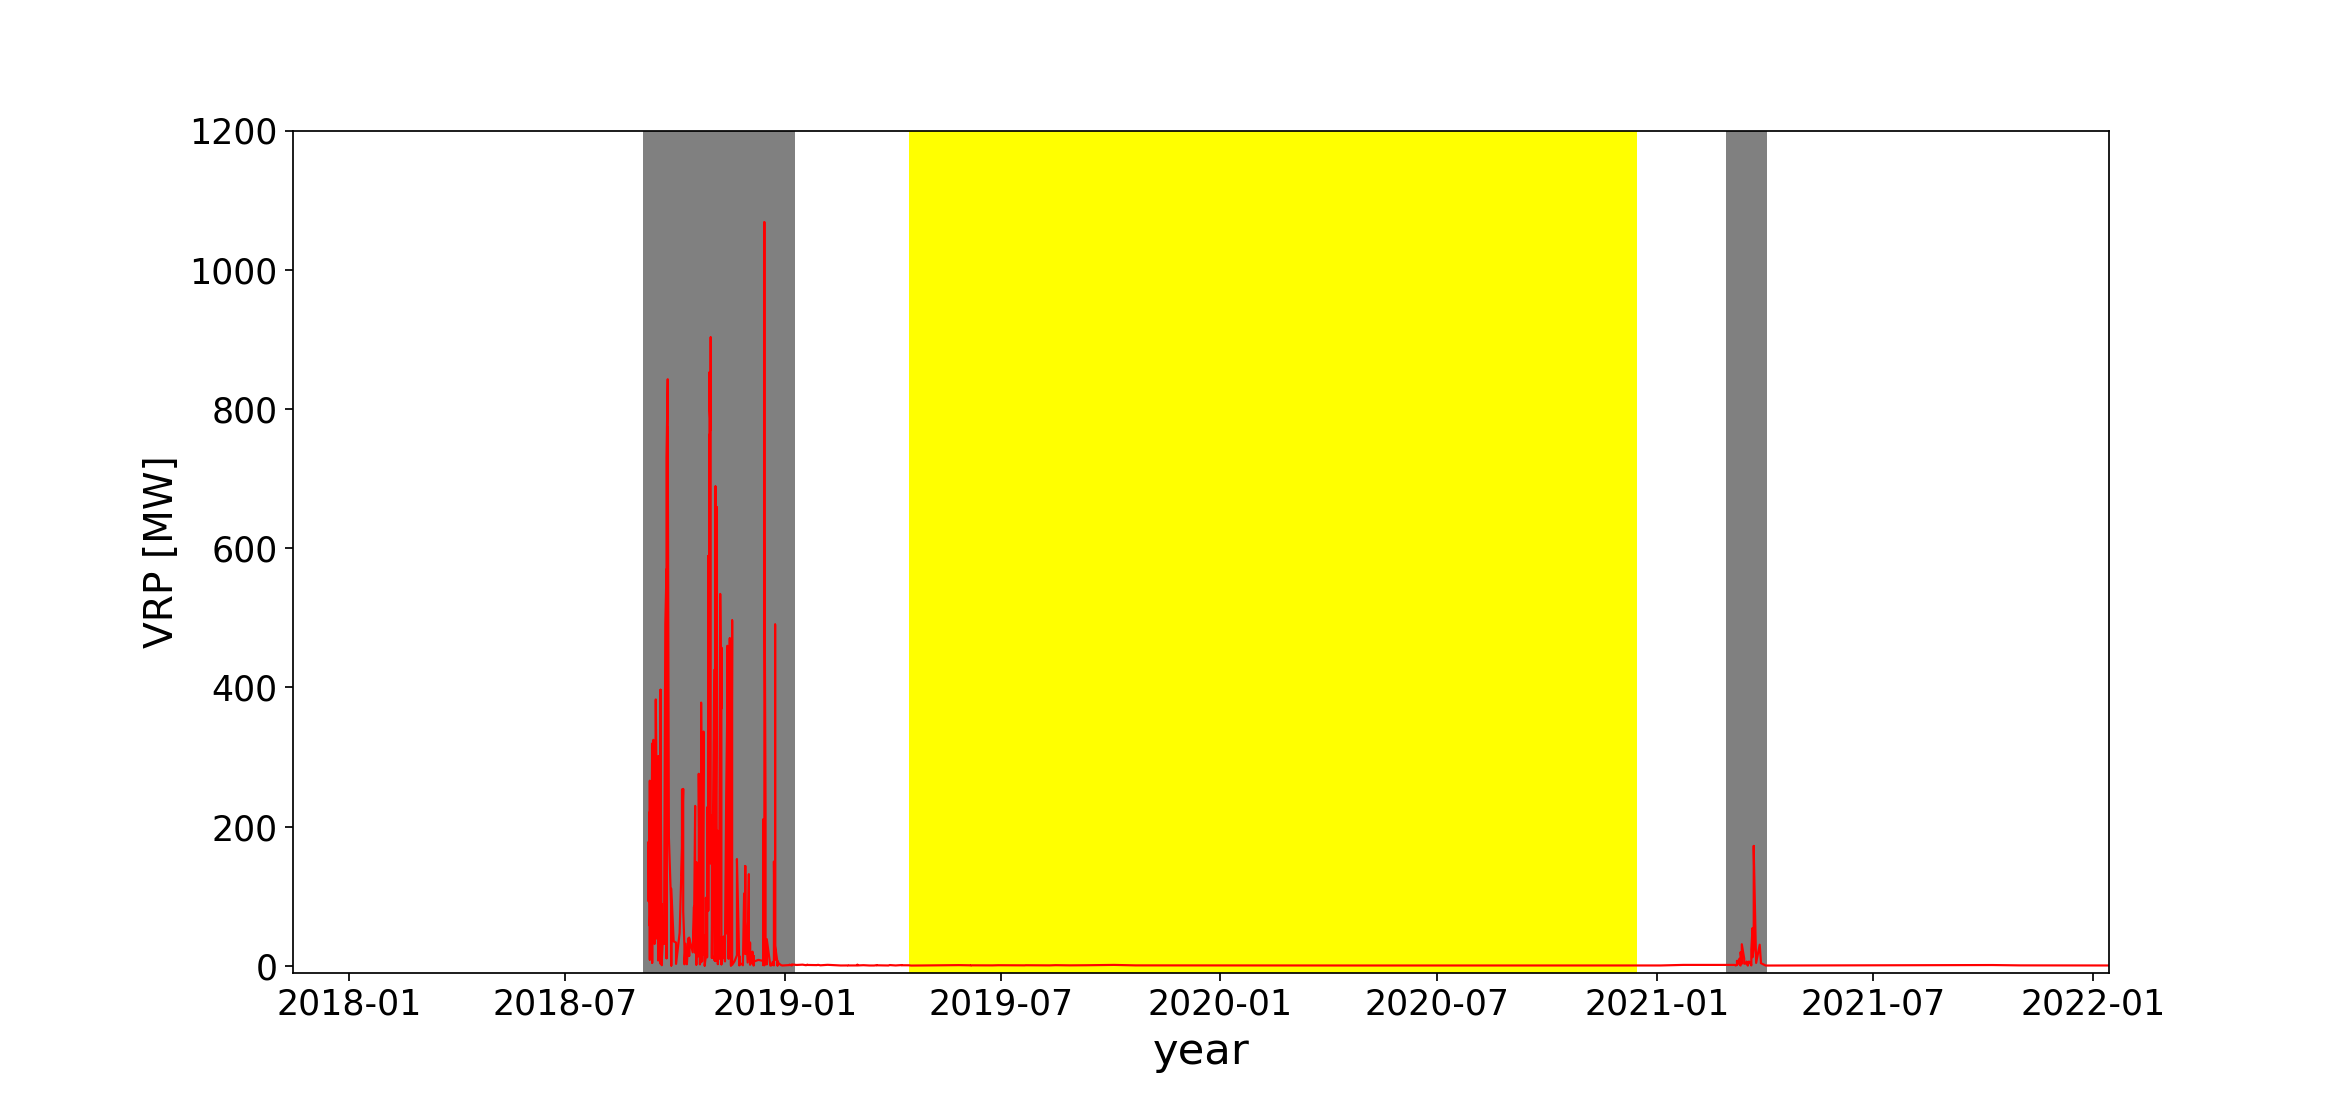

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text yticklabel objects>)

In [6]:
fig,ax=plt.subplots(figsize=(15,7))

# set gray regions for volcanic active (and activity-free) periods

for item in range(0,len(data_MIROVA)):
    plt.axvspan(event_2021_start,event_2021_end,facecolor='grey',alpha=0.1)
    plt.axvspan(event_2018_start,event_2018_end,facecolor='grey',alpha=0.5)
    plt.axvspan(no_activity_start,no_activity_end,facecolor='yellow',alpha=0.5)

ax.plot(data_MIROVA['Date'],data_MIROVA['VRP (MW)'],color='r',linewidth=1,label='VRP [MW]')
plt.xlim([datetime(2017,11,15),datetime(2022,1,15)])
plt.ylim([-10,1200])
ax.set_xlabel('year',fontsize=20)
plt.xticks(fontsize=16)
ax.set_ylabel('VRP [MW]',fontsize=18)
plt.yticks(fontsize=16)